# UFO Sighting

In [1]:
#librerie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importo i dati
ufo = pd.read_table("scrubbed.csv", sep = ",")

C:\Users\lnv81f500w7ix\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
ufo.shape

(80332, 11)

In [4]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments',
       'date posted', 'latitude', 'longitude '], dtype=object)

In [6]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


# Pulizia Dati

In [7]:
#Credo una copia su cui smanettare
ufo_df = ufo.copy()

Trasformo la variabile 'datetime'

In [8]:
# ufo_df['datetime'] = ufo_df['datetime'].astype('datetime64')
 # ParserError: hour must be in 0..23: 10/11/2006 24:00

In [9]:
ufo_df[ufo_df['datetime'].str.contains("24:00")] # Non legge le ore 24:00

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
388,10/11/2006 24:00,rome,ny,us,oval,120,a min or two,I was walking from the garage to the house&#44...,2/1/2007,43.2127778,-75.456111
693,10/1/2001 24:00,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000,2 years,go to: http://www.24horas.com.pe/data/videos/...,3/4/2003,-5.129547,-80.120569
962,10/1/2012 24:00,novi,mi,us,triangle,300,5 minutes,V shaped and 8 big and very brite lights&#44mo...,10/30/2012,42.4805556,-83.475556
1067,10/12/2003 24:00,salatiga (indonesia),NaN,NaN,disk,22,22 seconds,UFO in Salatiga&#44Indonesia,10/31/2003,-7.33683,110.498817
1221,10/12/2013 24:00,cincinnati,oh,us,fireball,300,3-5 minutes,A bright orange light split into four&#44 did ...,10/14/2013,39.1619444,-84.456944
...,...,...,...,...,...,...,...,...,...,...,...
79136,9/4/2005 24:00,boonville,nc,us,cigar,10800,3+ hours,Unusual activity in our small community&#44 cr...,9/9/2013,36.2325,-80.708333
79137,9/4/2005 24:00,redondo beach,ca,us,triangle,300,5 minutes,Triangulat UFO seen over Redondo Beach&#44 Cal...,12/16/2005,33.8492,-118.387500
79740,9/7/2002 24:00,portsmouth,oh,us,changing,900,15 minutes,A bright red light hoovering in the sky.,9/13/2002,38.7317,-82.997778
79759,9/7/2004 24:00,montrose,co,us,unknown,1200,20 minutes,Stationary object with three pulsating lights ...,9/9/2004,38.4783,-107.875556


In [10]:
ufo_df["datetime"] = ufo_df["datetime"]. replace('24:00', '00:00', regex = True)  #Sostituisco 24:00 con 00:00
ufo_df['datetime'] = ufo_df['datetime'].astype('datetime64') # converto

In [11]:
#Trasformo anche 'date posted'
ufo_df['date posted'] = ufo_df['date posted'].astype('datetime64')

Latitudine e Longitudine 

In [12]:
# ufo_df["latitude"] = ufo_df['latitude'].astype(float)

   # ValueError: could not convert string to float: '33q.200088'

In [13]:
ufo_df[ufo_df['latitude'].str.contains('q', na = False)] #trovo la 'q' che impedisce la conversione

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43782,1974-05-22 05:30:00,mescalero indian reservation,nm,NaN,rectangle,180,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,33q.200088,-105.624152


In [14]:
ufo_df['latitude'] = ufo_df['latitude']. replace("q", '', regex = True) # sostituisco
ufo_df["latitude"] = ufo_df['latitude'].astype(float) # coverto in float

In [15]:
ufo_df['longitude'] = ufo_df['longitude '].astype(float) #ho tolto lo spazio dopo il nome della variabile 'longitude'
ufo_df = ufo_df.drop(columns=['longitude ']) #elimino la vecchia variabile

Tempo di durata degli avvistamenti

In [16]:
# ufo_df['duration (seconds)'].astype('float64')
   # ValueError: could not convert string to float: '2`'

In [17]:
ufo_df[ufo_df['duration (seconds)'].str.contains("`", na = False)] #ci sono 3 valori con l'accento che impediscono la conversione

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
27822,2000-02-02 19:33:00,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2000-02-16,33.932500,-114.005000
35692,2005-04-10 22:52:00,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,2005-04-16,36.974167,-122.029722
58591,2006-07-21 13:00:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,2006-10-30,4.440663,-75.244141


In [18]:
ufo_df['duration (seconds)'] = ufo_df['duration (seconds)']. replace("`", '', regex = True) #sostituisco 
ufo_df['duration (seconds)'] = ufo_df['duration (seconds)'].astype('float64') # coverto

Creo una nuova colonna con la durata in minuti 

In [19]:
ufo_df['duration(minutes)'] = ufo_df['duration (seconds)'] /60

### Missing Values

In [20]:
ufo_df.isnull().sum()  #Ho dei valori nulli in stato e paese. 

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
duration(minutes)          0
dtype: int64

Potrei usare un reverse geocoding dalle coordinate lat e long per riempirli

In [21]:
#importo la libreria
import reverse_geocoder as rg 

In [22]:
coordinates = list(zip(ufo_df['latitude'], ufo_df['longitude'])) #Creo una variabile con la tupla di lat e long (per passarla a reverse_geocoding)
results = rg.search(coordinates) # cerco le località


Loading formatted geocoded file...


In [23]:
results_df = pd.DataFrame(results) #Converto in df
results_df.head()
# name = città
# admin1 = stato
# cc = paese

,lat,lon,name,admin1,admin2,cc
0,29.88327,-97.94139,San Marcos,Texas,Hays County,US
1,29.38663,-98.61797,Lackland Air Force Base,Texas,Bexar County,US
2,53.20832,-2.9253,Blacon,England,Cheshire West and Chester,GB
3,28.97859,-96.64609,Edna,Texas,Jackson County,US
4,21.40929,-157.80092,Kane'ohe,Hawaii,Honolulu County,US


In [24]:
#creo le nuove colonne con i dati ottenuti dal reverse geocoding
ufo_df['country_rg']=results_df['cc']
ufo_df['city_rg']=results_df['name']
ufo_df['state_rg'] = results_df['admin1']

In [25]:
(ufo_df[['country','country_rg','state','state_rg','city','city_rg']])

,country,country_rg,state,state_rg,city,city_rg
0,us,US,tx,Texas,san marcos,San Marcos
1,NaN,US,tx,Texas,lackland afb,Lackland Air Force Base
2,gb,GB,NaN,England,chester (uk/england),Blacon
3,us,US,tx,Texas,edna,Edna
4,us,US,hi,Hawaii,kaneohe,Kane'ohe
...,...,...,...,...,...,...
80327,us,US,tn,Tennessee,nashville,Nashville
80328,us,US,id,Idaho,boise,Boise
80329,us,US,ca,California,napa,Napa
80330,us,US,va,Virginia,vienna,Vienna


In [26]:
ufo_df.isnull().sum() #le nuove variabili non hanno missing

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
duration(minutes)          0
country_rg                 0
city_rg                    0
state_rg                   0
dtype: int64

Elimino ciò che è superfluo

In [27]:
# Elimino ciò che è superfluo
ufo_df = ufo_df.drop(['country','state','city','duration (hours/min)','duration (seconds)'],axis=1)

In [28]:
#Rinomino e riordino
ufo_df = ufo_df.rename(columns={'date posted' : 'date_posted',
                       'country_rg': 'country',
                       'state_rg': 'state',
                       'city_rg': 'city' })

ufo_clean = ufo_df[["datetime", "country", "state", "city", "shape", "duration(minutes)","comments", "date_posted","latitude","longitude"]]

In [29]:
ufo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           80332 non-null  datetime64[ns]
 1   country            80332 non-null  object        
 2   state              80332 non-null  object        
 3   city               80332 non-null  object        
 4   shape              78400 non-null  object        
 5   duration(minutes)  80332 non-null  float64       
 6   comments           80317 non-null  object        
 7   date_posted        80332 non-null  datetime64[ns]
 8   latitude           80332 non-null  float64       
 9   longitude          80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 6.1+ MB


In [30]:
ufo_clean.head()

,datetime,country,state,city,shape,duration(minutes),comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,US,Texas,San Marcos,cylinder,45.000000,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,US,Texas,Lackland Air Force Base,light,120.000000,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,GB,England,Blacon,circle,0.333333,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,US,Texas,Edna,circle,0.333333,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,US,Hawaii,Kane'ohe,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


# Analisi Esplorativa

Frequenza per paese
Quasi il 90% degli avvistamenti riportati sono avvenuti degli Stati Uniti

In [31]:
ufo_clean['country'].value_counts()/len(ufo_clean) #numero di avvistamenti per paese 

US    0.882637
CA    0.044665
GB    0.029714
AU    0.007880
MX    0.002938
        ...   
YE    0.000012
AX    0.000012
CM    0.000012
MO    0.000012
KG    0.000012
Name: country, Length: 164, dtype: float64

Focus su Stati Uniti: 
Frequenza per stato. La California è lo stato con il numero maggiore di avvistamenti UFO

In [32]:
ufo_us = ufo_clean[ufo_clean['country'] == 'US']
(ufo_us['state'].value_counts()/len(ufo_us)).head(10)

California      0.135479
Washington      0.060095
Florida         0.059334
Texas           0.052099
New York        0.046006
Arizona         0.038178
Illinois        0.037290
Pennsylvania    0.036500
Ohio            0.033961
Michigan        0.029180
Name: state, dtype: float64

Mappa Coropletica

In [33]:
# creo il dataframe che colorerà la mappa
df_us = pd.DataFrame(ufo_us['state'].value_counts())
df_us = df_us.reset_index() 
df_us = df_us.rename(columns={'index' : 'state',
                              'state' : 'frequency'})

In [34]:
import os # importo il modulo os
state_geo = os.path.join('us-states.json') #per caricare lo shapefile
import folium #per la mappa coropletica (leaflet)
import branca.colormap as cm

In [35]:
# inizializzo la mappa
m = folium.Map(location=[37, -102], zoom_start=4)

In [36]:
# Aggiungo i colori per la coropletica
m.choropleth(
 geo_data=state_geo, 
 name='choropleth',
 data= df_us,                        #i dati che voglio mappare
 columns=['state', 'frequency'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Frequency'
)
folium.LayerControl().add_to(m)

display(m)

C:\Users\lnv81f500w7ix\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Avvistamenti in base alla dimensione temporale

In [37]:
# Creo nuove variabili temporali 
ufo_clean['year'] = pd.DatetimeIndex(ufo_clean['datetime']).year
ufo_clean['month'] = pd.DatetimeIndex(ufo_clean['datetime']).month
ufo_clean['day'] = pd.DatetimeIndex(ufo_clean['datetime']).day
ufo_clean['hour'] = pd.DatetimeIndex(ufo_clean['datetime']).hour 

<ipython-input-37-72406013601f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_clean['year'] = pd.DatetimeIndex(ufo_clean['datetime']).year
<ipython-input-37-72406013601f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_clean['month'] = pd.DatetimeIndex(ufo_clean['datetime']).month
<ipython-input-37-72406013601f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Frequenza degli avvistamenti annuali dal 1906 al 2014
Notiamo un evidente aumento degli avvistamenti a partire dal 1995.

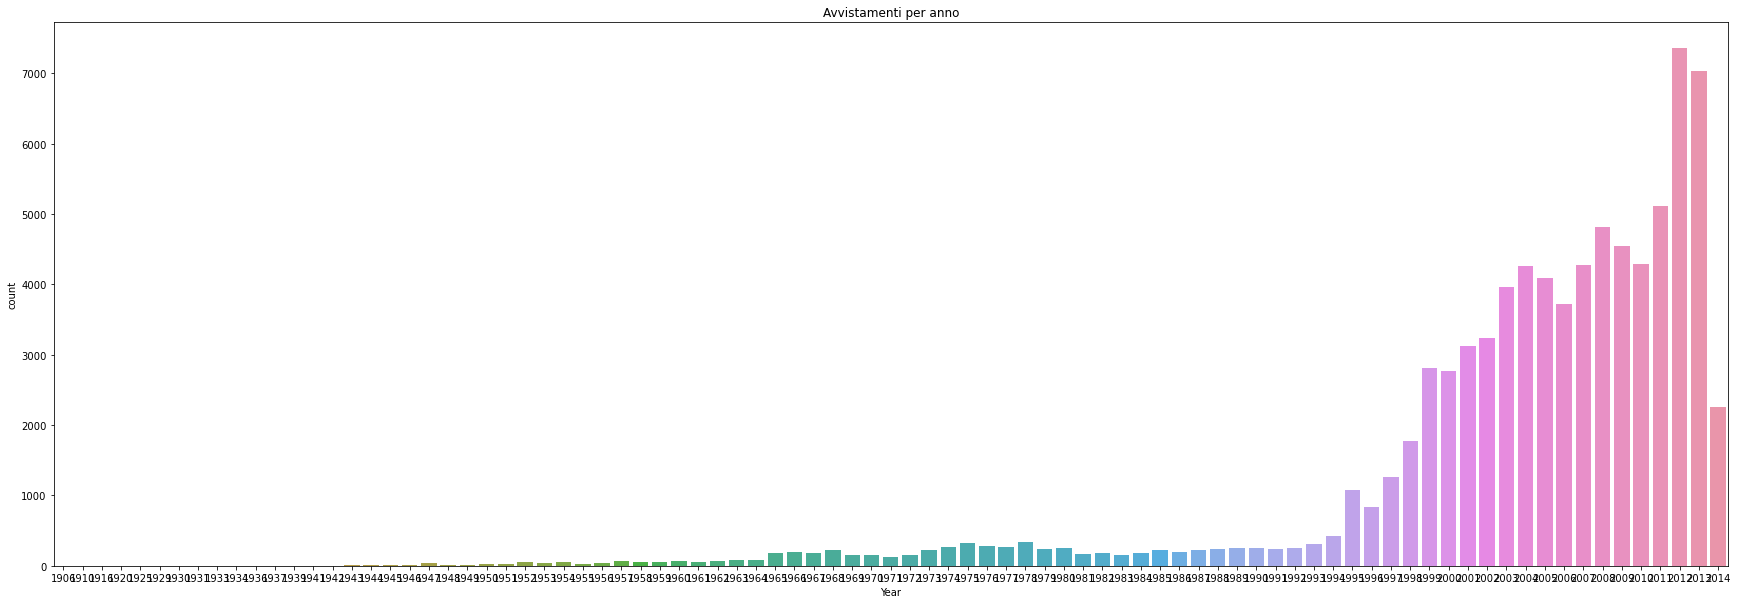

In [38]:
plt.figure(figsize=(30,10))
sns.countplot(x=ufo_clean['year'])
plt.title('Avvistamenti per anno')
plt.xlabel('Year')
plt.show()

Avvistamenti per mese
Notiamo che il numero maggiore di avvistamenti è nei mesi caldi, in particolare a luglio

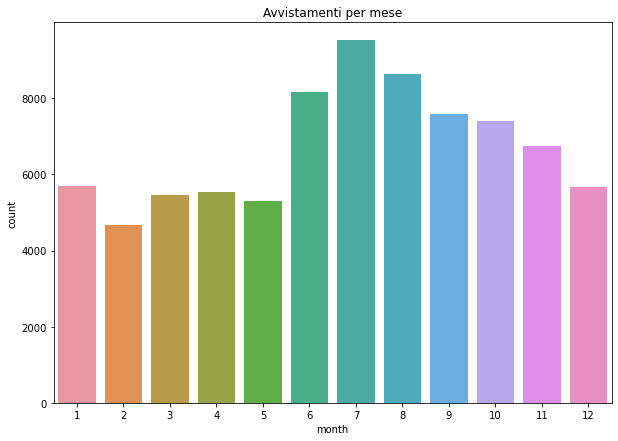

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x=ufo_clean['month'])
plt.title('Avvistamenti per mese')
plt.show()

Avvistamenti per giorno del mese.
Ci sono più avvistamenti il 1 e il 15 del mese. 
Il motivo?
solo gli alieni lo sanno

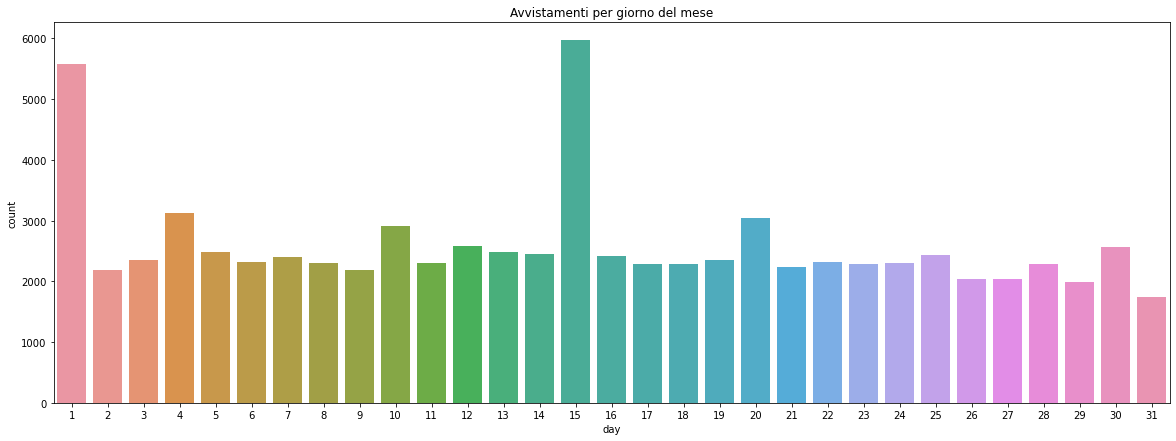

In [40]:
plt.figure(figsize=(20,7))
sns.countplot(x=ufo_clean['day'])
plt.title('Avvistamenti per giorno del mese')
plt.show()

Avvistamenti per ora del giorno.
Gli avvistamenti aumentano nelle ore serali a patire dalle 17, per arrivare ad un picco alle 21 e poi riscendere nella notte.

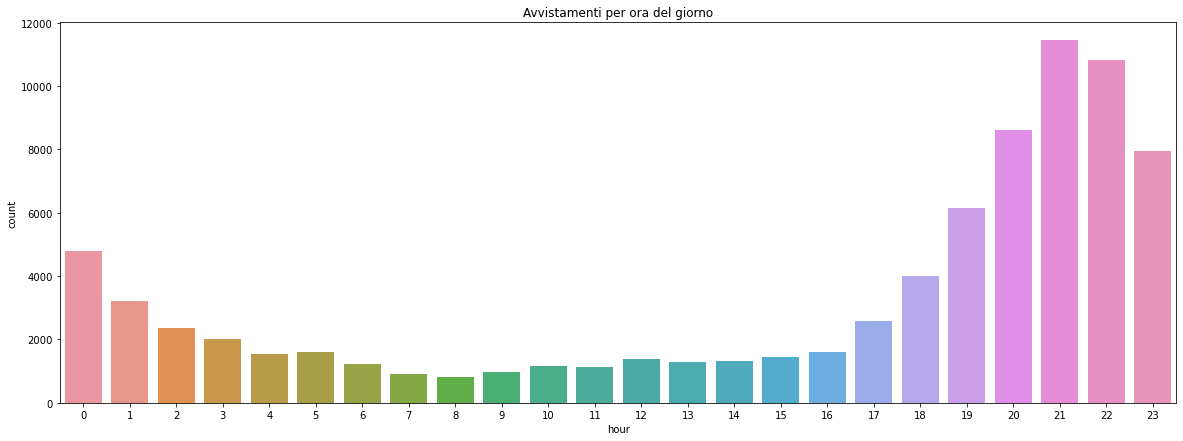

In [41]:
plt.figure(figsize=(20,7))
sns.countplot(x=ufo_clean['hour'])
plt.title('Avvistamenti per ora del giorno')
plt.show()

Avvistamenti per giorno della settimana
Il numero maggiore di avvistamenti è di sabato

In [42]:
#giorno della settimana
ufo_clean['dayofweek'] = pd.DatetimeIndex(ufo_clean['datetime']).dayofweek
ufo_clean['dayofweek'] = ufo_clean['dayofweek'].astype('str')
ufo_clean['dayofweek'] = ufo_clean['dayofweek'].replace({'0': 'Lunedì','1':'Martedì','2':'Mercoledì','3':'Giovedì','4':'Venerdì','5':'Sabato','6':'Domenica'}, regex=True)

<ipython-input-42-20e56cc100bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_clean['dayofweek'] = pd.DatetimeIndex(ufo_clean['datetime']).dayofweek
<ipython-input-42-20e56cc100bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_clean['dayofweek'] = ufo_clean['dayofweek'].astype('str')
<ipython-input-42-20e56cc100bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

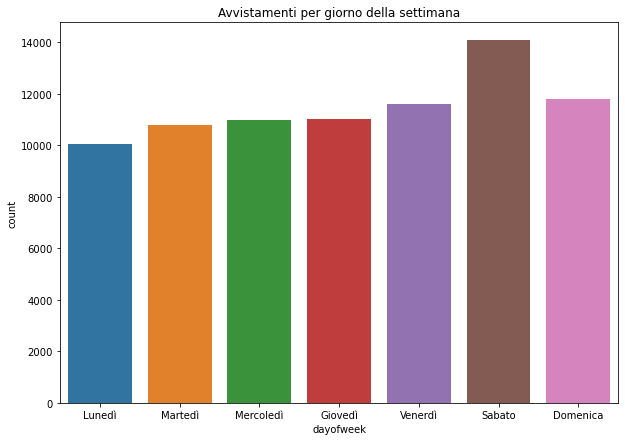

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x = ufo_clean['dayofweek'], order=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.title('Avvistamenti per giorno della settimana')
plt.show()

# commenti

In [43]:
comments = ufo_clean['comments'].dropna().tolist() # rimuovo i missing e trasformo in lista
com2 = "".join(comments) #unisco i commenti 

In [44]:
from wordcloud import WordCloud 

In [45]:
from PIL import Image  # importo l'immagine

In [46]:
ufo_mask = np.array(Image.open( "ufo2.jpg")) # Carico l'immagine

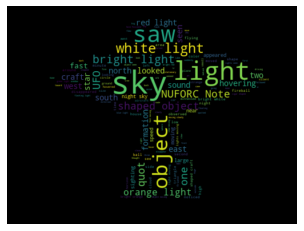

In [47]:
# Creo il wordcloud
wordcloud = WordCloud(mask=ufo_mask).generate(com2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Forma degli UFO

([<matplotlib.axis.XTick at 0x22bbc265100>,
 [Text(0, 0, 'light'),
  Text(1, 0, 'triangle'),
  Text(2, 0, 'circle'),
  Text(3, 0, 'fireball'),
  Text(4, 0, 'other'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'sphere'),
  Text(7, 0, 'disk'),
  Text(8, 0, 'oval'),
  Text(9, 0, 'formation'),
  Text(10, 0, 'cigar'),
  Text(11, 0, 'changing'),
  Text(12, 0, 'flash'),
  Text(13, 0, 'rectangle'),
  Text(14, 0, 'cylinder'),
  Text(15, 0, 'diamond'),
  Text(16, 0, 'chevron'),
  Text(17, 0, 'egg'),
  Text(18, 0, 'teardrop'),
  Text(19, 0, 'cone'),
  Text(20, 0, 'cross'),
  Text(21, 0, 'delta'),
  Text(22, 0, 'crescent'),
  Text(23, 0, 'round'),
  Text(24, 0, 'hexagon'),
  Text(25, 0, 'flare'),
  Text(26, 0, 'dome'),
  Text(27, 0, 'changed'),
  Text(28, 0, 'pyramid')])

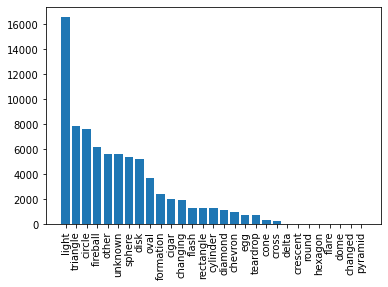

In [48]:
# barplot delle shape
counts = ufo_clean['shape'].value_counts()
names = counts.index

postionofbars = list(range(len(names)))
plt.bar(postionofbars,counts)
plt.xticks(postionofbars,names,rotation=90)

Aggrego le forme simili

In [49]:
circular_light = ["disk", "circle", "sphere", "egg", "oval", "round", "light", "fireball", "flash", "flare"]
geometric_other = ["triangle", "delta", "diamond", "pyramid", "chevron", "rectangle", "cylinder", "cone", "hexagon", "other", "unknow", "formation", "cigar", "changing", "teardrop", "cross", "crescent", "dome", "changed"]

ufo_clean['shape_group2'] = ["circular or light" if x in circular_light
                             else "geometricor other"
                             for x in ufo_clean['shape']]

<ipython-input-49-0676a915c5f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_clean['shape_group2'] = ["circular or light" if x in circular_light


([<matplotlib.axis.XTick at 0x22bbc1ffa90>,
 [Text(0, 0, 'circular or light'), Text(1, 0, 'geometricor other')])

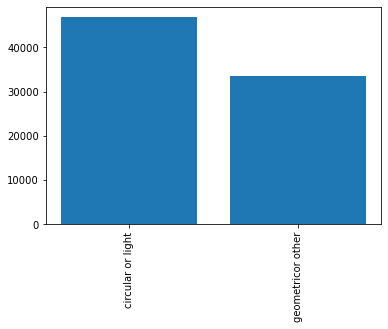

In [50]:
# barplot delle shape
counts = ufo_clean['shape_group2'].value_counts()
names = counts.index

postionofbars = list(range(len(names)))
plt.bar(postionofbars,counts)
plt.xticks(postionofbars,names,rotation=90)

### Multinomial Naive Bayes

Utilizzeremo il Naive Bayes per fare text classification.
Faremo riferimento alla variabile *comments*. L'obiettivo è quello di prevedere la classe di apparteneza in base al tipo di commento.
La classe di appartenenza è definita da *shape group2*.
Utilizzeremo quindi il seguente dataset.

In [67]:
ufo_clean[['comments', 'shape_group2']].head()

,comments,shape_group2
0,This event took place in early fall around 194...,geometricor other
1,1949 Lackland AFB&#44 TX. Lights racing acros...,circular or light
2,Green/Orange circular disc over Chester&#44 En...,circular or light
3,My older brother and twin sister were leaving ...,circular or light
4,AS a Marine 1st Lt. flying an FJ4B fighter/att...,circular or light


In [68]:
#Rimiovo le osservazioni che non hanno shape o comments
ufo_clean = ufo_clean.dropna(axis = 0, subset = ['shape', 'comments'])
ufo_clean['comments'] = ufo_clean['comments'].astype(str) #trasformo i commenti in stringa

In [69]:
ufo_clean['shape_group2'].value_counts()

circular or light    46798
geometricor other    31594
Name: shape_group2, dtype: int64

### Natural Language Processing
Prima di procedere con il Naive Bayes dobbiamo applicare delle trasformazioni ai commenti

In [70]:
import nltk 
from nltk import word_tokenize #per splittare una frase in parole

In [71]:
from nltk.corpus import stopwords 

stopWords = set(stopwords.words('english'))
print(stopWords) #Stopwwords della lingua inglese che eliminerò

{'this', 'you', 'against', 'they', 'did', 'only', 'these', 'ain', "aren't", 'needn', 'aren', 'not', 'after', 'himself', 'during', 'weren', 'will', 'into', 'those', 'now', 'ourselves', 'having', 'have', 'who', 'haven', 'between', "don't", "you'll", 'was', 'had', 'other', 'own', 'be', 'don', 'any', 'yours', 'when', 'if', 'at', 'them', 'yourself', 'couldn', 'for', 'of', 'from', 'each', 'while', 'herself', 'and', 'won', 'an', 'just', 'we', 'it', 'too', 't', 'should', 'than', 'in', 'd', "hadn't", 'ma', 'such', 'on', "should've", 'again', 'been', 'about', "mightn't", 'before', 'how', 'didn', "mustn't", 'our', 'because', 'shouldn', "shouldn't", 'then', "you've", "couldn't", 'she', 'mightn', "you'd", 'which', 'off', 'by', 'wouldn', 'out', "she's", "hasn't", 'isn', 'hasn', 'there', 'above', 'o', 'below', 'your', 'a', 'her', 'ours', 'their', 'is', 'but', 'll', 'shan', 'theirs', 'both', 'most', "haven't", 's', 'do', 'nor', 'doesn', "weren't", 'or', 'am', 'with', 'that', 'what', 'my', 'has', "shan

Per poter applicare il Naive Bayes è necessario rimuovere la punteggiatura.
Creo la funzione 'text_cleaning' che effettua la pulizia del testo rimuovendo punteggiatura e stopwords

In [72]:
import string # modulo con la funzione per rimuovere la punteggiaura

In [73]:
def text_cleaning(a):
    remove_punctuation = [char for char in a if char not in string.punctuation] # seleziono ogni carattere che non è in punteggiatura 
    #print(remove_puntuaction)
    remove_punctuation = "".join(remove_punctuation) #ri-unisco i miei caratteri puliti
    #print(remove_punctuation)
    return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')] #divido la nuova frase in parole, ed elimino le stopwords

In [74]:
print(ufo_clean.iloc[:,6].apply(text_cleaning)) # commenti splittati in parole dopo aver rimosso punteggiatura e stopwords

0        [event, took, place, early, fall, around, 1949...
1        [1949, Lackland, AFB44, TX, Lights, racing, ac...
2        [GreenOrange, circular, disc, Chester44, England]
3        [older, brother, twin, sister, leaving, Edna, ...
4        [Marine, 1st, Lt, flying, FJ4B, fighterattack,...
                               ...                        
80327    [Round, distanceslowly, changing, colors, hove...
80328    [Boise44, ID44, spherical44, 20, min44, 10, re...
80329                                        [Napa, UFO44]
80330    [Saw, five, gold, lit, cicular, craft, moving,...
80331    [2, witnesses, 2, miles, apart44, Red, amp, Wh...
Name: comments, Length: 78392, dtype: object


Splitto il dataset in trainset e testset

In [75]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split in train test sets
x_train, x_test, y_train, y_test = train_test_split(ufo_clean['comments'], ufo_clean['shape_group2'], test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(58794,) (19598,) (58794,) (19598,)


Il Naive Bayes necessita di numeri, non parole. Dobbiamo quindi fare *labeling coding*, cioè assegnare un numero ad ogni parola. Per questo utilizzeremo *CountVectorizer*.

Applico la Trasformazione al training set

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
###  Train  ###
vectorizer_train = CountVectorizer(analyzer = text_cleaning)
ufo_transformer_train = vectorizer_train.fit(x_train) #'adatto' i dati alla funzione CountVectorizer

In [78]:
#print(len(ufo_transformer.vocabulary_))
ufo_transformer_train.vocabulary_  # così vedo quale numero è assegnato ad ogni parola

{'NUFORC': 15065,
 'Note': 15395,
 'Possible': 16909,
 'sighting': 42341,
 'Mars': 14156,
 'PD': 16087,
 'Massive': 14200,
 'brilliant': 25183,
 'white': 47396,
 'light': 34281,
 'hung': 32768,
 'Southern': 19284,
 'sky': 42666,
 'left': 34161,
 'Broad': 6610,
 'ACRES': 4542,
 'APPROX': 4708,
 '2215': 2031,
 'DRIVING': 8501,
 'NORTHEAST44PASSENGER': 15032,
 'SPOTTED': 18294,
 'OBJECT': 15479,
 'FIRSTIT': 9816,
 'LAKE': 12942,
 'TRAVELING': 20032,
 'SW': 18458,
 'NE': 14950,
 'DOWNWARD': 8481,
 'AR': 4720,
 'White': 21850,
 'disk': 28425,
 'flying': 30785,
 'park': 38056,
 'fast': 30119,
 'thing': 45126,
 'Ive': 12409,
 'seen': 41766,
 'point': 38786,
 'light44': 34291,
 'two': 46046,
 'objects': 37068,
 'parallel': 38021,
 'turn': 45967,
 '1530': 1375,
 'observed': 37175,
 '2': 1765,
 'spheres': 43526,
 'high': 32250,
 'altitude': 22977,
 'west': 47269,
 'east': 29063,
 'fast44': 30122,
 'passing': 38128,
 'sun': 44451,
 'could': 27078,
 'see': 41737,
 'spherical': 43538,
 'shape': 419

Ora bisogna trasformare i risultati attraverso *.transform* 

In [79]:
#trasformo
comments_ufo_train = ufo_transformer_train.transform(x_train)
print(comments_ufo_train)

  (0, 14156)	1
  (0, 14200)	1
  (0, 15065)	1
  (0, 15395)	1
  (0, 16087)	1
  (0, 16909)	1
  (0, 19284)	1
  (0, 25183)	1
  (0, 32768)	1
  (0, 34281)	1
  (0, 42341)	1
  (0, 42666)	1
  (0, 47396)	1
  (1, 2031)	1
  (1, 4542)	1
  (1, 4708)	1
  (1, 4720)	1
  (1, 6610)	1
  (1, 8481)	1
  (1, 8501)	1
  (1, 9816)	1
  (1, 12942)	1
  (1, 14950)	1
  (1, 15032)	1
  (1, 15479)	1
  :	:
  (58791, 20799)	1
  (58791, 39597)	1
  (58792, 1765)	1
  (58792, 12630)	1
  (58792, 15065)	1
  (58792, 15395)	1
  (58792, 16087)	1
  (58792, 30586)	1
  (58792, 30945)	1
  (58792, 34421)	1
  (58792, 38665)	1
  (58792, 41857)	1
  (58792, 41912)	1
  (58792, 42666)	1
  (58792, 43318)	1
  (58792, 45786)	1
  (58793, 6352)	1
  (58793, 30010)	1
  (58793, 34281)	1
  (58793, 36109)	1
  (58793, 40674)	1
  (58793, 42666)	1
  (58793, 42911)	1
  (58793, 43875)	1
  (58793, 46578)	1


Il primo numero indica la riga (0 = primo commento, 1 = secondo commento etc..). 
Il secondo numero indica il valore numerico assegnato alla parola.
Il terzo numero indica il numero di volte che quella parola è presente in quel commento.

Lo applico anche al test set

In [80]:
comments_ufo_test = vectorizer_train.transform(x_test)
print(comments_ufo_test)

# "Your CountVectorizer has already been fitted with the training data. So for your test data, you just want to call transform(), not fit_transform()". cit. stackoverflow

  (0, 21703)	1
  (0, 36989)	1
  (0, 42666)	1
  (1, 2365)	1
  (1, 11952)	1
  (1, 25097)	1
  (1, 28882)	1
  (1, 30046)	1
  (1, 34009)	1
  (1, 34421)	1
  (1, 36744)	1
  (1, 36865)	1
  (1, 36989)	1
  (1, 38634)	1
  (1, 41975)	1
  (1, 45804)	1
  (1, 46067)	1
  (2, 10229)	1
  (2, 11782)	1
  (2, 13428)	1
  (2, 14451)	1
  (3, 33862)	1
  (3, 35711)	1
  (3, 36328)	1
  (3, 40776)	1
  :	:
  (19595, 26071)	1
  (19595, 27160)	1
  (19595, 29551)	1
  (19595, 32458)	1
  (19595, 34421)	1
  (19595, 36153)	1
  (19595, 36989)	1
  (19595, 41190)	1
  (19595, 42945)	1
  (19595, 43507)	1
  (19595, 46724)	1
  (19595, 47396)	1
  (19596, 11065)	1
  (19596, 14434)	1
  (19596, 15111)	1
  (19596, 15357)	1
  (19596, 26630)	1
  (19596, 28191)	1
  (19596, 30364)	1
  (19596, 37517)	1
  (19597, 15823)	1
  (19597, 30785)	1
  (19597, 37068)	1
  (19597, 42666)	1
  (19597, 46276)	1


Ora devo trovare in ogni commento quale parola è più importate, assegnando ad essa un peso.
TF-IDF (term frequency-inverse document frequency) serve a trovare la parola più significativa.

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

In [82]:
### Train ###
tfidf_transformer_train = TfidfTransformer().fit(comments_ufo_train) # fit
print(tfidf_transformer_train)

TfidfTransformer()


In [83]:
comments_tfidf_train = tfidf_transformer_train.transform(comments_ufo_train)
print(comments_tfidf_train) #questi sono i valori tfidf per tutti i commenti
print(comments_tfidf_train.shape)
#La parola che ha il valore TF-IDF più alto sarà quella più importante nel commento. (importanza calcolato su tutto il dataset)

  (0, 47396)	0.17352733227667527
  (0, 42666)	0.12998669939952442
  (0, 42341)	0.22982450629507148
  (0, 34281)	0.12933883862955067
  (0, 32768)	0.4040370917265026
  (0, 25183)	0.3238750431143014
  (0, 19284)	0.34547974226941225
  (0, 16909)	0.26390653213674337
  (0, 16087)	0.20957528522018415
  (0, 15395)	0.20905490023861184
  (0, 15065)	0.20967505903046785
  (0, 14200)	0.38337094600564753
  (0, 14156)	0.3843660948687704
  (1, 34161)	0.1537340176136312
  (1, 20032)	0.23539260064689776
  (1, 18458)	0.18210380690760464
  (1, 18294)	0.24574949078101
  (1, 15479)	0.17802300479656208
  (1, 15032)	0.31202964040866704
  (1, 14950)	0.18004641784005818
  (1, 12942)	0.24574949078101
  (1, 9816)	0.31202964040866704
  (1, 8501)	0.2321369633738845
  (1, 8481)	0.31202964040866704
  (1, 6610)	0.25455186058734014
  :	:
  (58791, 18840)	0.47181978251457807
  (58791, 16390)	0.44546092842199736
  (58792, 45786)	0.4005971249089671
  (58792, 43318)	0.2863665336089364
  (58792, 42666)	0.11600027283153137
 

In [84]:
###   Test   ###
tfidf_transformer_test = TfidfTransformer().fit(comments_ufo_test) #fit
print(tfidf_transformer_test)

TfidfTransformer()


In [85]:
comments_tfidf_test = tfidf_transformer_test.transform(comments_ufo_test) #trasformo
print(comments_tfidf_test) #questo sono i valori tfidf per tutto il vocabilario
print(comments_tfidf_test.shape)

  (0, 42666)	0.25274240705536183
  (0, 36989)	0.2653374701979445
  (0, 21703)	0.9304393062337901
  (1, 46067)	0.3133925891828533
  (1, 45804)	0.22040902463733344
  (1, 41975)	0.21814594304567642
  (1, 38634)	0.2783502661284352
  (1, 36989)	0.14088000834283557
  (1, 36865)	0.3643712858002917
  (1, 36744)	0.22406120531391263
  (1, 34421)	0.13373112466715026
  (1, 34009)	0.22049490564351074
  (1, 30046)	0.3800192802438823
  (1, 28882)	0.25729618303575774
  (1, 25097)	0.1611058610631247
  (1, 11952)	0.4268062238423749
  (1, 2365)	0.2002117427341902
  (2, 14451)	0.4696769355552101
  (2, 13428)	0.3431967267167023
  (2, 11782)	0.6845609475273757
  (2, 10229)	0.4393129773849502
  (3, 47003)	0.508461125345834
  (3, 40776)	0.3581433436418668
  (3, 36328)	0.49006889875624093
  (3, 35711)	0.46492719739511373
  :	:
  (19595, 46724)	0.34378447400048007
  (19595, 43507)	0.23634376758990214
  (19595, 42945)	0.23663493722401618
  (19595, 41190)	0.22885799591156622
  (19595, 36989)	0.1341103570282968
  

### Multinomial Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
#inserisco nel modello comments_tfidf e la variabile che funge da classe 'shape_group'
model = MultinomialNB().fit(comments_tfidf_train, y_train)


In [88]:
all_predictions = model.predict(comments_tfidf_test)
print(all_predictions)

['circular or light' 'geometricor other' 'circular or light' ...
 'circular or light' 'circular or light' 'circular or light']


In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
#Confusion matrix di valori osservati e predizioni
confusion_matrix(y_test, all_predictions)


array([[11245,   524],
       [ 4896,  2933]], dtype=int64)

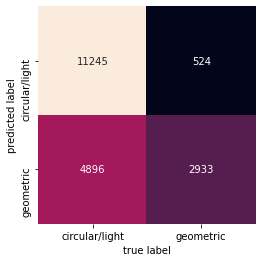

In [91]:
mat = confusion_matrix(y_test, all_predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels = ['circular/light', 'geometric'],
            yticklabels = ['circular/light', 'geometric'])
plt.xlabel('true label')
plt.ylabel('predicted label');

La procedura del Multinomial Naive Bayes l'ho presa da questo video:
https://www.youtube.com/watch?v=oq68P8Kv7nE

Un'altro riferimento utile per il Naive Bayes ma anche per tutto il resto: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html